# Investigating Stack OverFlow Data

In the vastly expanding world of digital services, we have all pondered the question at one time or the other. How does one get into tech? It is a difficult question to ponder as there are a myriad number of ways to get into tech. You work as a UI designer, Marketer, Content Manager, UX Researcher and a Product Marketer or software engineering.

To provide some insight on tech, we look at the Stack Overflow develper survey.

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. We willl be examining the 2020 survey.

In analyzing this dataset, we will be using the CRISP-DM process which covers the 6 stage process.

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Questions

Glancing at this dataset, we can ask a number of questions on this dataset and answer few questions we are interested in.

1. What is the best and most popular language to start learning?
2. How and Where do Developers Search For New Jobs?
3. What size of Organization Do New Developers Typically Join?
4. How much are new developers earning?

## Understanding Our Data

Data
The data is made up of two files:

survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

In order to get a better understanding of the data let's take a look at some of the characteristics of the dataset.

In [529]:
#First, let's read in the data and necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_palette('pastel')
sns.set_style('whitegrid')

In [530]:
df = pd.read_csv('2020/survey_results_public.csv')
question_df = pd.read_csv('2020/survey_results_schema.csv')

df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


We will start with exploring and understanding the dataset before we ask our questions

In [531]:
num_rows , num_cols = df.shape

print(f'We have {num_rows} rows and {num_cols} in the dataset')

We have 64461 rows and 61 in the dataset


Let's take a look at the columns in the dataset

In [532]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Not much of it makes outright sense. We can take a look at the schema for each column to see what questions are being asked.

In [533]:
question_df['QuestionText'][0:10]

0    Randomized respondent ID number (not in order ...
1    Which of the following options best describes ...
2                              Do you code as a hobby?
3    What is your age (in years)? If you prefer not...
4    At what age did you write your first line of c...
5     Is that compensation weekly, monthly, or yearly?
6    What is your current total compensation (salar...
7    Salary converted to annual USD salaries using ...
8                                   Where do you live?
9    Which currency do you use day-to-day? If your ...
Name: QuestionText, dtype: object

Lets see which columns have missing values.

In [534]:
missing_vals = df.isnull().sum()

#selecting only columns that are missing data
missing_vals = missing_vals[missing_vals != 0].sort_values(ascending=False)
missing_vals

ConvertedComp                   29705
CompTotal                       29635
NEWPurchaseResearch             27140
PurchaseWhat                    25097
WebframeDesireNextYear          24437
CompFreq                        24392
MiscTechWorkedWith              24147
NEWJobHuntResearch              23439
WorkWeekHrs                     23310
NEWDevOpsImpt                   22729
WebframeWorkedWith              22182
NEWJobHunt                      22175
MiscTechDesireNextYear          22082
NEWOnboardGood                  21838
NEWDevOps                       21775
NEWOvertime                     21230
Sexuality                       20469
DatabaseDesireNextYear          20391
OrgSize                         20127
JobSat                          19267
Age                             19015
CurrencyDesc                    18989
CurrencySymbol                  18989
Ethnicity                       18513
YearsCodePro                    18112
SOPartFreq                      17669
NEWCollabToo

Columns without missing values.

In [535]:
not_missing_vals = df.isnull().sum()

#selecting only columns that are missing data
not_missing_vals = not_missing_vals[not_missing_vals == 0]
not_missing_vals

Respondent    0
dtype: int64

In [536]:
print(f'We have {missing_vals.shape[0]} columns with missing data')
print(f'We have {df.shape[1] - missing_vals.shape[0]} columns without missing data')

We have 60 columns with missing data
We have 1 columns without missing data


We have 61 columns and some of these are missing almost half of the data. We will come back to this when cleaning the data.

Moving on with the exploratory analysis. We search for the column data types.

In [537]:
#printing as a dict just to see the information better.
dict(df.dtypes)

{'Respondent': dtype('int64'),
 'MainBranch': dtype('O'),
 'Hobbyist': dtype('O'),
 'Age': dtype('float64'),
 'Age1stCode': dtype('O'),
 'CompFreq': dtype('O'),
 'CompTotal': dtype('float64'),
 'ConvertedComp': dtype('float64'),
 'Country': dtype('O'),
 'CurrencyDesc': dtype('O'),
 'CurrencySymbol': dtype('O'),
 'DatabaseDesireNextYear': dtype('O'),
 'DatabaseWorkedWith': dtype('O'),
 'DevType': dtype('O'),
 'EdLevel': dtype('O'),
 'Employment': dtype('O'),
 'Ethnicity': dtype('O'),
 'Gender': dtype('O'),
 'JobFactors': dtype('O'),
 'JobSat': dtype('O'),
 'JobSeek': dtype('O'),
 'LanguageDesireNextYear': dtype('O'),
 'LanguageWorkedWith': dtype('O'),
 'MiscTechDesireNextYear': dtype('O'),
 'MiscTechWorkedWith': dtype('O'),
 'NEWCollabToolsDesireNextYear': dtype('O'),
 'NEWCollabToolsWorkedWith': dtype('O'),
 'NEWDevOps': dtype('O'),
 'NEWDevOpsImpt': dtype('O'),
 'NEWEdImpt': dtype('O'),
 'NEWJobHunt': dtype('O'),
 'NEWJobHuntResearch': dtype('O'),
 'NEWLearn': dtype('O'),
 'NEWOffTopi

There are a number of Objects with the wrong data types. We expect Years of Code to be an integer and not an object. We will come back to this when cutting down our dataset.

In [538]:
dict(df.nunique())

{'Respondent': 64461,
 'MainBranch': 5,
 'Hobbyist': 2,
 'Age': 110,
 'Age1stCode': 63,
 'CompFreq': 3,
 'CompTotal': 3003,
 'ConvertedComp': 6958,
 'Country': 183,
 'CurrencyDesc': 142,
 'CurrencySymbol': 141,
 'DatabaseDesireNextYear': 3193,
 'DatabaseWorkedWith': 2808,
 'DevType': 8269,
 'EdLevel': 9,
 'Employment': 7,
 'Ethnicity': 208,
 'Gender': 7,
 'JobFactors': 230,
 'JobSat': 5,
 'JobSeek': 3,
 'LanguageDesireNextYear': 16243,
 'LanguageWorkedWith': 14256,
 'MiscTechDesireNextYear': 5216,
 'MiscTechWorkedWith': 2730,
 'NEWCollabToolsDesireNextYear': 1277,
 'NEWCollabToolsWorkedWith': 1153,
 'NEWDevOps': 3,
 'NEWDevOpsImpt': 5,
 'NEWEdImpt': 5,
 'NEWJobHunt': 2172,
 'NEWJobHuntResearch': 63,
 'NEWLearn': 4,
 'NEWOffTopic': 3,
 'NEWOnboardGood': 3,
 'NEWOtherComms': 2,
 'NEWOvertime': 5,
 'NEWPurchaseResearch': 63,
 'NEWPurpleLink': 4,
 'NEWSOSites': 61,
 'NEWStuck': 444,
 'OpSys': 4,
 'OrgSize': 9,
 'PlatformDesireNextYear': 7471,
 'PlatformWorkedWith': 6287,
 'PurchaseWhat': 3

Lastly, we will check for duplicated data

In [539]:
print(f'We have {df.duplicated().sum()} duplicated rows')

We have 0 duplicated rows


## Preparing Our Data for Analysis

We will drop columns that are not necessary for our questions. We are asking questions about language popularity, Job Research and Languages Used. We also need to differentiate between new and old developers.

Reading through the schema dataset, we can find columns dealing with these facts are:
'OrgSize, YearsCode , LanguageWorkedWith, NEWJobHuntResearch, ConvertedComp'

In [540]:
new_df = df[['LanguageWorkedWith', 'OrgSize','YearsCode','NEWJobHuntResearch','ConvertedComp']].copy()
new_df.head()

,LanguageWorkedWith,OrgSize,YearsCode,NEWJobHuntResearch,ConvertedComp
0,C#;HTML/CSS;JavaScript,2 to 9 employees,36,NaN,NaN
1,JavaScript;Swift,"1,000 to 4,999 employees",7,NaN,NaN
2,Objective-C;Python;Swift,NaN,4,NaN,NaN
3,NaN,20 to 99 employees,7,NaN,NaN
4,HTML/CSS;Ruby;SQL,NaN,15,NaN,NaN


To keep our dataset in it's best possible state, we will not remove *null values* but rather deal with them while analyzing our questions

### Data Types

We will deal with the different datatypes in our dataset, removing and converting the datatypes as necessary.

In [541]:
new_df.dtypes

LanguageWorkedWith     object
OrgSize                object
YearsCode              object
NEWJobHuntResearch     object
ConvertedComp         float64
dtype: object

Of all our columns, we need YearsCode, ConvertedComp and OrgSize as integers or categorized strings

**1. LanguageWorkedWith**

This column has strings and the right data type and so is fine.

In [542]:
new_df.LanguageWorkedWith.unique()

array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

**2. OrgSize**

We need to convert OrgSize to an integer but it seems we can only have categories

In [543]:
new_df.OrgSize.unique()

array(['2 to 9 employees', '1,000 to 4,999 employees', nan,
       '20 to 99 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10,000 or more employees', '100 to 499 employees',
       '500 to 999 employees', '10 to 19 employees',
       '5,000 to 9,999 employees'], dtype=object)

We can pare down the lenght of the text on the respnses with a function.

In [545]:
def clean_org_size(text):
    '''Cleans text data by stripping out the word employees and replacing "to" with "-".
    Return
    Cleaned text (str) - A string of cleaned text. Will return nan if the input is not a string.
    '''
    
    if not isinstance(text, str): 
        if np.isnan(text):
            return np.nan
    if 'freelancer' in text:
        return 'Freelancer, sole proprietor'
    text = text.replace('to', '-')
    text = text.split('employees')[0].strip()
    return text

new_df['OrgSize'] = new_df['OrgSize'].apply(clean_org_size)

**3. YearsCode**

We need to cast YearsCode to an integer

In [546]:
new_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

We can deal with this after setting 'More than 50 years' to 51
and the string values 'Less than 1 year' to 0

In [547]:
def cast_code_years(year):
    '''Cleans integer data. 
    Return integer if given an integer, return 50 and 0 for less specific strings.
    '''
    if not isinstance(year, str): 
        if np.isnan(year):
            return np.nan
    if year == 'More than 50 years':
        return 51
    elif year == 'Less than 1 year':
        return 0
    elif year == ' ':
        return -1
    else:
        return int(year)

In [548]:
new_df['YearsCode'] = new_df['YearsCode'].apply(cast_code_years)

In [549]:
new_df['YearsCode'].unique()

array([36.,  7.,  4., 15.,  6., 17.,  8., 10., 35.,  5., 37., 19.,  9.,
       22., 30., 23., 20.,  2.,  0.,  3., 13., 25., 16., 43., 11., 38.,
       33., nan, 24., 21., 12., 40., 27., 50., 46., 14., 18., 28., 32.,
       44., 26., 42., 31., 34., 29.,  1., 39., 41., 45., 51., 47., 49.,
       48.])

**4 NEWJobHuntResearch**

In [550]:
new_df.NEWJobHuntResearch.unique()[0:5]

array([nan,
       'Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family',
       'Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company',
       'Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company',
       'Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other

This object is fine as is.

**ConvertedComp**

We need to cast ConvertedComp to an integer

In [551]:
new_df.ConvertedComp

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
64456   NaN
64457   NaN
64458   NaN
64459   NaN
64460   NaN
Name: ConvertedComp, Length: 64461, dtype: float64

We have the right data type, but we'll synchronise our nans across columns

In [552]:
print(f'We have: {np.isnan(new_df.ConvertedComp).sum()} null columns')

new_df['ConvertedComp'] = new_df['ConvertedComp'].apply(lambda x: x if not np.isnan(x) else np.nan) 

print(f'We still have: {np.isnan(new_df.ConvertedComp).sum()} null columns')

We have: 29705 null columns
We still have: 29705 null columns


In [553]:
new_df['ConvertedComp'][:5]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedComp, dtype: float64

## Asking Our Questions

### 1. What is the best and most popular language to start learning?

In [554]:
#We  look through the question schema for where our column is located.
location = np.where(df.columns == 'LanguageWorkedWith')

question_df.loc[location].values[0]

array(['LanguageWorkedWith',
       'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'],
      dtype=object)

In [555]:
lang_df = new_df['LanguageWorkedWith'].dropna().reset_index()

lang_df = lang_df['LanguageWorkedWith'].str.split(';', expand=True)
lang_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,C#,HTML/CSS,JavaScript,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JavaScript,Swift,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Objective-C,Python,Swift,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [556]:
lang_df = pd.DataFrame(lang_df.values.reshape(-1,1), columns=['Languages']).dropna()

#We arrange all the languages under one column we can count
lang_df.head()

,Languages
0,C#
1,HTML/CSS
2,JavaScript
25,JavaScript
26,Swift


In [557]:
lang_df = lang_df.value_counts().reset_index()
lang_df = lang_df.rename(columns={0:'counts'}).sort_values('counts', ascending=False)
lang_df.head()

,Languages,counts
0,JavaScript,38822
1,HTML/CSS,36181
2,SQL,31413
3,Python,25287
4,Java,23074


Creating Our Bar Chart on the most popular languages

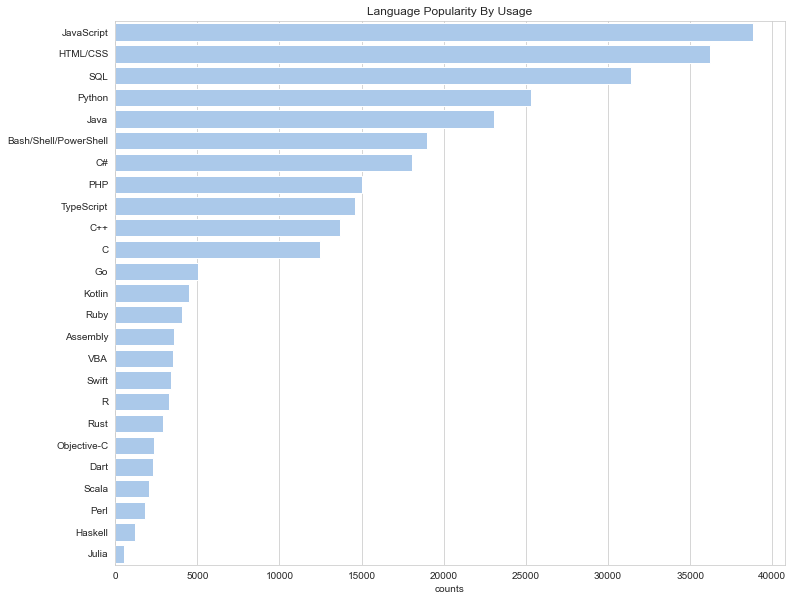

In [558]:
f, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='counts', y='Languages', 
              color=sns.color_palette()[0],
              data=lang_df, ax=ax);

ax.set(ylabel=None)
ax.set_title('Language Popularity By Usage');

Javascript is unsuprisingly the most popular, followed by HMTL/CSS (also expected). SQL and then Python.

### 2. How do Developers Search For New Jobs?

In [561]:
#We  look through the question schema for where our column is located.
location = np.where(df.columns == 'NEWJobHuntResearch')

question_df.loc[location].values[0]

array(['NEWJobHuntResearch',
       'When job searching, how do you learn more about a company? Select all that apply.'],
      dtype=object)

In [562]:
search_df = new_df['NEWJobHuntResearch'].dropna().reset_index()

In [563]:
search_df = search_df['NEWJobHuntResearch'].str.split(';', expand=True)
search_df.head(3)

,0,1,2,3,4,5
0,"Read company media, such as employee blogs or ...",Company reviews from third party sites (e.g. G...,Publicly available financial information (e.g....,Personal network - friends or family,None,None
1,"Read company media, such as employee blogs or ...",Company reviews from third party sites (e.g. G...,Personal network - friends or family,"Read other media like news articles, founder p...",None,None
2,Company reviews from third party sites (e.g. G...,Publicly available financial information (e.g....,Personal network - friends or family,"Read other media like news articles, founder p...",None,None


In [564]:
search_df = pd.DataFrame(search_df.values.reshape(-1,1),columns=['Responses']).dropna()

In [565]:
search_df = search_df.value_counts().reset_index()
search_df = search_df.rename(columns={0:'counts'}).sort_values('counts', ascending=False)
search_df

,Responses,counts
0,Company reviews from third party sites (e.g. G...,28549
1,"Read company media, such as employee blogs or ...",26777
2,Personal network - friends or family,25989
3,"Read other media like news articles, founder p...",20187
4,Directly asking current or past employees at t...,14840
5,Publicly available financial information (e.g....,10823


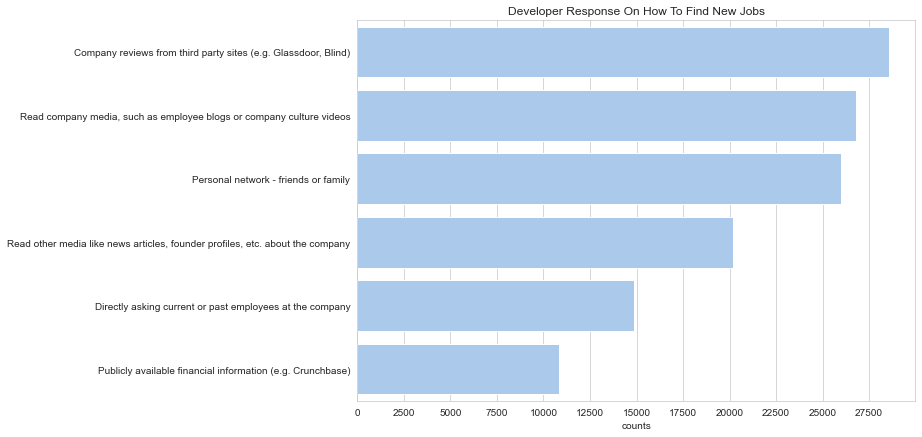

In [566]:
f, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='counts', y='Responses', 
              color=sns.color_palette()[0],
              data=search_df, ax=ax);

ax.set(ylabel=None)
ax.set_xticks(range(0,30000,2500))
ax.set_title('Developer Response On How To Find New Jobs');

Also, not very surprising that a large number of people use Glassdoor. Pretty much all profession benefit from its wonders.

### 3. What size of Organization Do New Developers Typically Join?

To answer this question, we can look at our original dataset and identify the exact question on Org Size 

In [591]:
#We  look through the question schema for where our column is located.
location = np.where(df.columns == 'OrgSize')

question_df.loc[location].values[0]

array(['OrgSize',
       'Approximately how many people are employed by the company or organization you currently work for?'],
      dtype=object)

In [592]:
years_df = new_df[(~new_df.YearsCode.isnull()) & (~new_df.OrgSize.isnull())].copy()
years_df = years_df[['OrgSize','YearsCode']]
years_df.head(2)

,OrgSize,YearsCode
0,2 - 9,36.0
1,"1,000 - 4,999",7.0


We can define new developers as developers with less than 3 years of experience.

In [601]:
def plot_size(devs_df, title, color=0):
    '''
    A helper function to plot charts of organisation sizes against developers
    
    Args
    devs_df (dataframe) - A dataframe of developer organisation counts 
    title (str) - Title of the plot
    '''
    org_count = devs_df['OrgSize'].value_counts()
    org_count = org_count.reset_index().rename(columns={'index':'Org Size','OrgSize':'counts'})

    f, ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x='counts', y='Org Size', 
                  color=sns.color_palette()[color],
                  data=org_count, ax=ax);

    ax.set_title(title);
    ax.set_xlabel('Number of Developers');
    ax.set_ylabel('Organisation Size');

In [602]:
new_devs_df = years_df[years_df['YearsCode'] <= 3]

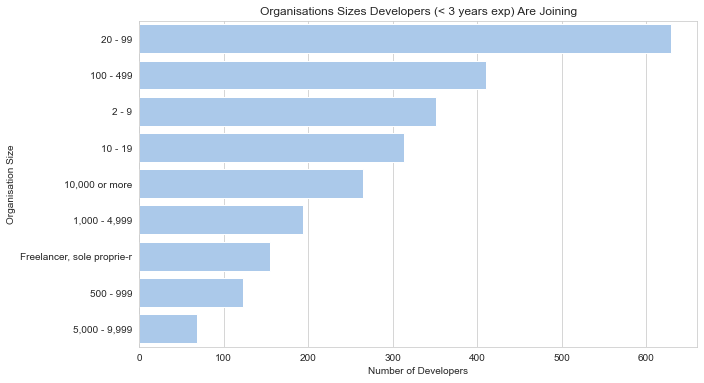

In [621]:
plot_size(new_devs_df, 'Organisations Sizes Developers (< 3 years exp) Are Joining',0)

Medium-Large organisations are definitely doing the heavy lifting on hiring new developers.

In [611]:
med_devs_df = years_df[(years_df['YearsCode'] > 3) & (years_df['YearsCode'] <= 10)]

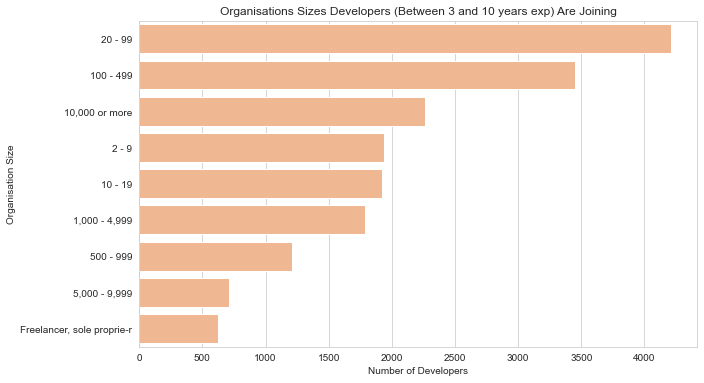

In [612]:
plot_size(med_devs_df, 'Organisations Sizes Developers (Between 3 and 10 years exp) Are Joining', 1)

The same for medium experience developers. Medium-Large organisations are definitely doing the heavy lifting.

In [613]:
old_devs_df = years_df[(years_df['YearsCode'] > 10) & (years_df['YearsCode'] < 30)]

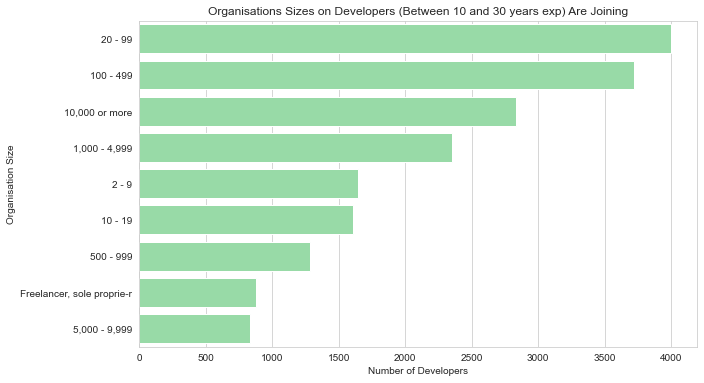

In [614]:
plot_size(old_devs_df, 'Organisations Sizes on Developers (Between 10 and 30 years exp) Are Joining', 2)

In [616]:
oldest_devs_df = years_df[(years_df['YearsCode'] > 30)]

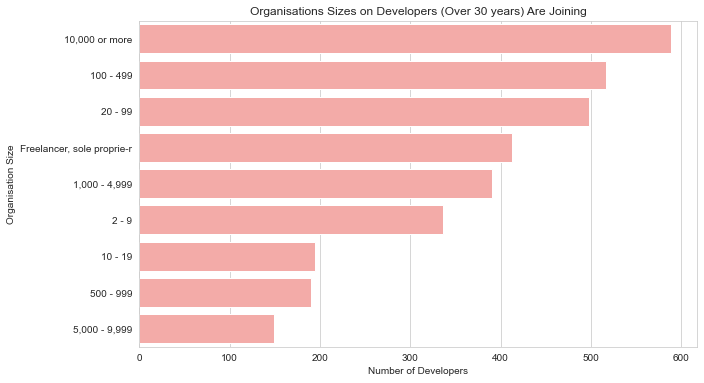

In [619]:
plot_size(oldest_devs_df, 'Organisations Sizes on Developers (Over 30 years) Are Joining', 3)

We can definitely very small changes with regards to organizations hiring

### 4. How much are new developers earning?

In [691]:
#We  look through the question schema for where our column is located.
location = np.where(df.columns == 'ConvertedComp')

question_df.loc[location].values[0]

array(['ConvertedComp',
       'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'],
      dtype=object)

In [674]:
ages_df = new_df[(~new_df.YearsCode.isnull()) & (~new_df.ConvertedComp.isnull())].copy()
ages_df = ages_df[['ConvertedComp','YearsCode']]
ages_df.head(2)

,ConvertedComp,YearsCode
7,116000.0,17.0
9,32315.0,8.0


In [675]:
new_devs = ages_df[ages_df['YearsCode'] <= 3]

In [676]:
new_devs_salary = new_devs.groupby('YearsCode').mean().reset_index()
new_devs_salary.head()

,YearsCode,ConvertedComp
0,0.0,66783.621951
1,1.0,99947.768473
2,2.0,80056.653620
3,3.0,61442.297242


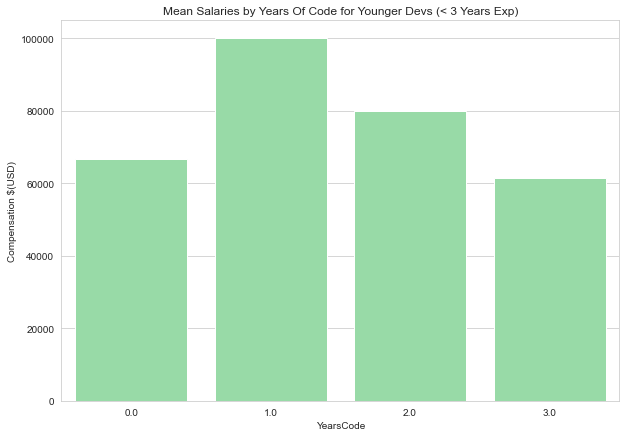

In [690]:
f, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='YearsCode', y='ConvertedComp', 
              color=sns.color_palette()[2],
              data=new_devs_salary, ax=ax);

ax.set_title('Mean Salaries by Years Of Code for Younger Devs (< 3 Years Exp)');
ax.set_ylabel('Compensation $(USD)');

Now this should be surprising but we have to remember that a large number of devs did no disclose their salary information. Infact, this salary information had the highest number of missing values with 29705/64461 missing.

In [687]:
print('The top three missing columns') 
missing_vals[:3]

The top three missing columns


ConvertedComp          29705
CompTotal              29635
NEWPurchaseResearch    27140
dtype: int64

In [692]:
print(f'We have {df.shape[0]} rows') 

We have 64461 rows


# Conclusion

We have successfully navigated the dataset and answered poignant question that will be useful those seeking entry into software development as well as those seeking to hire them. We can of course do more, we can look at data across the years and provide ourselves with more balanced information.